# Lp problem with uncertanty

In [1]:
# Import library
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## Problem

We want to minimize the total capacity of energies and tables by each hour satisfy the electricity demand.

|             | solar| wind |coal  |gas   |nuclear| Load |
|-------------|------|------|------|------|-------|------|
| Hour 1 (i=1)| 0.9  | 0.8  | 1.   | 0.95 | 1     | 5    |
| Hour 2 (i=2)| 1.1  | 0.3  | 1.1  | 1.01 | 1.5   | 9    |
| Available   | j=1  | j=2  | j=3  | j=4  | j=5   |      |

The table show the energy provided (on average each index hour) for an ideal case.

## Ideal case - simple linear programming

Assume the resource consumption is exact.

In [2]:
labels = 'solar', 'wind','coal','gas','nuclear'

# Coefficients of the cost function
cost = np.array([1.1, 0.3, 1.1, 1.01, 1.5]) # minimize problem suppose cost is listed

# Coefficients of the constraints
cons1 = np.array([0.9, 0.8, 1. , 0.95, 1. ])
cons2 = np.array([1.1, 0.3, 1.1, 1.01, 1.5])

# Cost function
fun = lambda x: np.sum(cost * x)

# Constraints - ineq: greater than 0
cons = ({'type': 'ineq', 'fun': lambda x: np.sum(cons1 * x)-5},
        {'type': 'ineq', 'fun': lambda x: np.sum(cons2 * x)-9})

# Bounds
bounds = ((0, None),(0, None),(0, None),(0, None),(0, None))

# Initial guess
init_guess = np.array([1., 1., 1., 1., 1.])

Cost function opt results:  9.0
Alocation: 


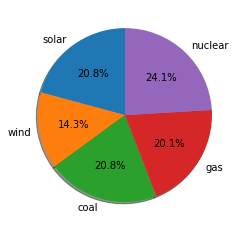

In [3]:
# Optimize

opt_results = minimize(fun, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
Alocation = opt_results['x']
print('Cost function opt results: ',round(opt_results['fun'],2))
print('Alocation: ')
sizes = Alocation.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

In [4]:
print("objective cost function:", round(np.sum(cost * Alocation), 4))
print("constraint 1:", round(np.sum(cons1 * Alocation), 6) >= 5)
print("constraint 2:", round(np.sum(cons2 * Alocation), 6) >= 9)

objective cost function: 9.0
constraint 1: True
constraint 2: True


## With uncertainty

What if the resource consumption is uncertaion? i.e., the coeffiecients deviate form its nominal (average) value.  

|             | solar  | wind    |   coal   |   gas   |nuclear  | Load |
|-------------|--------|------|------|------|-------|------|
| Hour 1 (i=1)| 0.9±0.3| 0.8±0.2 | 1. ±0.1  | 0.95±0.1 | 1  ±0.05   | 5   |
| Hour 2 (i=2)| 1.1±0.2| 0.3±0.25| 1.1±0.15 | 1.01±0.12| 1.5±0.04   | 9    |
| Available   | j=1  | j=2  | j=3  | j=4  | j=5   |      |

### Optmistic case

use the most resource to produce more electricity.

|             | solar  | wind    |   coal   |   gas   |nuclear  | Load |
|-------------|--------|------|------|------|-------|------|
| Hour 1 (i=1)| 0.9+0.3| 0.8+0.2 | 1. +0.1  | 0.95+0.1 | 1  +0.05   | 5   |
| Hour 2 (i=2)| 1.1+0.2| 0.3+0.25| 1.1+0.15 | 1.01+0.12| 1.5+0.04   | 9    |
| Available   | j=1  | j=2  | j=3  | j=4  | j=5   |      |

In [5]:
# Coefficients of the cost function
cost = np.array([1.1, 0.3, 1.1, 1.01, 1.5]) # minimize problem suppose cost is listed

# Coefficients of the constraints
cons1 = np.array([1.2, 1.  , 1.1 , 1.05, 1.05 ])
cons2 = np.array([1.3, 0.55, 1.25, 1.13, 1.54])

# Cost function
fun = lambda x: np.sum(cost * x)

# Constraints - ineq: greater than 0
cons = ({'type': 'ineq', 'fun': lambda x: np.sum(cons1 * x)-5},
        {'type': 'ineq', 'fun': lambda x: np.sum(cons2 * x)-9})

# Bounds
bounds = ((0, None),(0, None),(0, None),(0, None),(0, None))

# Initial guess
init_guess = np.array([1., 1., 1., 1., 1.])

Cost function opt results:  4.91
Alocation: 


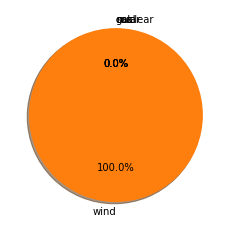

In [6]:
# Optimize
opt_results = minimize(fun, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
Alocation = opt_results['x']
print('Cost function opt results: ',round(opt_results['fun'],2))
print('Alocation: ')
sizes = Alocation.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()


In [7]:
print("objective cost function:", round(np.sum(cost * Alocation), 4))
print("constraint 1:", round(np.sum(cons1 * Alocation), 6) >= 5)
print("constraint 2:", round(np.sum(cons2 * Alocation), 6) >= 9)

objective cost function: 4.9091
constraint 1: True
constraint 2: True


### Pessimistic case

use the least resource to produce less electricity.

|             | solar  | wind    |   coal   |   gas   |nuclear  | Load |
|-------------|--------|------|------|------|-------|------|
| Hour 1 (i=1)| 0.9-0.3| 0.8-0.2 | 1. -0.1  | 0.95-0.1 | 1  -0.05   | 5   |
| Hour 2 (i=2)| 1.1-0.2| 0.3-0.25| 1.1-0.15 | 1.01-0.12| 1.5-0.04   | 9    |
| Available   | j=1  | j=2  | j=3  | j=4  | j=5   |      |

In [8]:
# Coefficients of the cost function
cost = np.array([1.1, 0.3, 1.1, 1.01, 1.5]) # minimize problem suppose cost is listed

# Coefficients of the constraints
cons1 = np.array([0.6, 0.6 , 0.9 , 0.85, 0.95 ])
cons2 = np.array([0.9, 0.05, 0.95, 0.89, 1.46])

# Cost function
fun = lambda x: np.sum(cost * x)

# Constraints - ineq: greater than 0
cons = ({'type': 'ineq', 'fun': lambda x: np.sum(cons1 * x)-5},
        {'type': 'ineq', 'fun': lambda x: np.sum(cons2 * x)-9})

# Bounds
bounds = ((0, None),(0, None),(0, None),(0, None),(0, None))

# Initial guess
init_guess = np.array([1., 1., 1., 1., 1.])


Cost function opt results:  9.25
Alocation: 


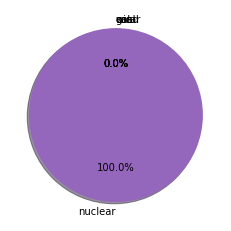

In [9]:
# Optimize
opt_results = minimize(fun, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

Alocation = opt_results['x']
print('Cost function opt results: ',round(opt_results['fun'],2))
print('Alocation: ')
sizes = Alocation.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

In [10]:
print("objective cost function:", round(np.sum(cost * Alocation), 4))
print("constraint 1:", round(np.sum(cons1 * Alocation), 6) >= 5)
print("constraint 2:", round(np.sum(cons2 * Alocation), 6) >= 9)

objective cost function: 9.2466
constraint 1: True
constraint 2: True


### Robust optimization

<!--bibtex
@article{bertsimas2004price,
  title={The price of robustness},
  author={Bertsimas, Dimitris and Sim, Melvyn},
  journal={Operations research},
  volume={52},
  number={1},
  pages={35--53},
  year={2004},
  publisher={Informs}
}

-->

The optmization model can represent as this form in this paper [CITE](#cite-bertsimas2004price):




\begin{array}{r l}
    \min        & z = \sum_{j=1}^{n} c_j x_j & \\
    \text{s.t.} & \sum_{j=1}^{n} a_{ij} x_{j} \geq b_i & \forall\, i=1,\dotsc,m \\
                & x_j \geq 0 & \forall\, j=1,\dotsc,n \\
\end{array}

where $a_{ij} \in [\bar a_{ij} -\hat a_{ij},\bar a_{ij} +\hat a_{ij}]$

We can define the uncerrtainty set is:

$\mathcal U_i = \{ a_{ij}\in \mathbb {R} : a_{ij}= \bar a_{ij} + \hat a_{ij}d_{ij}, -1 \leq d_{ij} \leq 1, \sum_{j \in J_i} d_{ij} \leq \Gamma_i  \}$

,where $\Gamma_i$ can be at most equal to the number of the uncertain parameters in the $i^{th}$ contraint; $J_i$ is the set of indexes of the constraints.

\begin{array}{r l}
\min & z = \sum_{j=1}^{n} c_j x_j & \\
\text{s.t.} & \sum_{j=1}^{n} \bar a_{ij} x_{j} - \max_{S_i \subseteq J_i, |S_i| = \Gamma_i} { \sum_{j \in S_i} \hat a_{ij} y_j } \geq b_i & \forall\, i=1,\dotsc,m \\
& x_j \leq y_j & \forall\, j=1,\dotsc,n\\
& x_j \geq 0,y_j \geq 0  & \forall\, j=1,\dotsc,n
\end{array}

If $\Gamma_i = 0$, then it becomes the nominal problem; if m > $\Gamma_i$ > 0, we are looking for the worst-case.

Use strong duality to take care of the max in the constraint, and substitute the the objective of the dual problem into the constraint.

\begin{array}{r l}
\min & z = \sum_{j=1}^{n} c_j x_j \\
s.t.
& \sum_{j=1}^{n} \bar a_{ij} x_{j} - z_i \Gamma_i - \sum_{j \in J_i} p_{ij} \geq b_i & \forall i \\
& z_i + p_{ij} \geq \hat a_{ij} y_j & \forall i, j\in J_i\\
& x_j \leq y_j & \forall j=1,...,n\\
& p_{ij} \geq 0 & \forall i, j \in J_i\\
& z_i \geq 0 & \forall i\\
& x_j \geq 0,y_j \geq 0  & \forall j
\end{array}

Therefore, the original problem can be reformulated to:

\begin{array}{r l}
\min & \sum_{j=1}^{n} c_j x_j  \\
s.t.
& 0.9x_1 + 0.8x_2 + x_3 + 0.95x_4 + x_5 - z_1 \Gamma_1 - \sum_{j=1}^{n} p_{1j} \geq 5 \\
& 1.1x_1 + 0.3x_2 + 1.1x_3 + 1.01x_4 + 1.5x_5 - z_2 \Gamma_2 - \sum_{j=1}^{n} p_{2j} \geq 9 \\
& z_1 + p_{11} \geq 0.3 y_1\\
& z_1 + p_{12} \geq 0.2 y_2\\
& z_1 + p_{13} \geq 0.1 y_3\\
& z_1 + p_{14} \geq 0.1 y_4\\
& z_1 + p_{15} \geq 0.05 y_5\\
& z_2 + p_{21} \geq 0.2 y_1\\
& z_2 + p_{22} \geq 0.25 y_2\\
& z_2 + p_{23} \geq 0.15 y_3\\
& z_2 + p_{24} \geq 0.12 y_4\\
& z_2 + p_{25} \geq 0.04 y_5\\
& x_1 \leq y_1 \\
& x_2 \leq y_2 \\
& x_3 \leq y_3 \\
& x_4 \leq y_4 \\
& x_5 \leq y_5 \\
& p_{ij} \geq 0 ,\forall i,j\\
& z_1,z_2 \geq 0\\
& y_1, y_2 , y_3 , y_4 , y_5 \geq 0\\
& x_1,x_2,x_3,x_4,x_5 \geq 0
\end{array}

|             | solar  | wind    |   coal   |   gas   |nuclear  | Load |
|-------------|--------|------|------|------|-------|------|
| Hour 1 (i=1)| 0.9±0.3| 0.8±0.2 | 1. ±0.1  | 0.95±0.1 | 1  ±0.05   | 5   |
| Hour 2 (i=2)| 1.1±0.2| 0.3±0.25| 1.1±0.15 | 1.01±0.12| 1.5±0.04   | 9    |
| Available   | j=1  | j=2  | j=3  | j=4  | j=5   |      |

In [11]:
def robust2(g):
    # Coefficients of the cost function
    cost = np.array([ 1.1, 0.3, 1.1, 1.01, 1.5, # [x1,x2,x3,x4,x5,
                      0.0, 0.0, 0.0, 0.0, 0.0,  # y1,y2,y3,y4,y5,
                      0.0, 0.0,                 # z1, z2,
                      0.0, 0.0, 0.0, 0.0, 0.0,  # p11, p12, p13, p14, p15,
                      0.0, 0.0, 0.0, 0.0, 0.0]) # p21, p22, p23, p24, p25]

    # Coefficients of the constraints
    # [x1,x2,x3,x4,x5,y1,y2,y3,y4,y5,z1,z2, p11, p12, p13, p14, p15, p21, p22, p23, p24, p25]
    cons1 = np.array([0.9, 0.8, 1. , 0.95, 1. , 0.0, 0.0, 0.0, 0.0, 0.0,-g[0],0.0,-1.0,-1.0,-1.0,-1.0,-1.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    cons2 = np.array([1.1, 0.3, 1.1, 1.01, 1.5, 0.0, 0.0, 0.0, 0.0, 0.0,0.0,-g[1], 0.0, 0.0, 0.0, 0.0, 0.0,-1.0,-1.0,-1.0,-1.0,-1.0])

    #                 [x1,  x2,  x3,   x4,  x5,  y1,  y2,  y3,  y4,  y5,  z1,  z2, p11, p12, p13, p14, p15, p21, p22, p23, p24, p25]
    cons3 = np.array([ 0.0, 0.0, 0.0, 0.0, 0.0,-0.3, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    cons4 = np.array([ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,-0.2, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    cons5 = np.array([ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,-0.1, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    cons6 = np.array([ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,-0.1, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    cons7 = np.array([ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,-0.05,1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0])

    cons8  = np.array([ 0.0, 0.0, 0.0, 0.0, 0.0,-0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0])
    cons9  = np.array([ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,-0.25,0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0])
    cons10 = np.array([ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,-0.15,0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0])
    cons11 = np.array([ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,-0.12,0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0])
    cons12 = np.array([ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,-0.04,0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0])
    
    cons13 = np.array([ -1.0,0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    cons14 = np.array([ 0.0, -1.0,0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    cons15 = np.array([ 0.0, 0.0, -1.0,0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    cons16 = np.array([ 0.0, 0.0, 0.0, -1.0,0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    cons17 = np.array([ 0.0, 0.0, 0.0, 0.0, -1.0,0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])


    # Cost function
    fun = lambda x: np.sum(cost * x)

    # Constraints - ineq: greater than 0
    cons = ({'type': 'ineq', 'fun': lambda x: np.sum(cons1 * x)-5},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons2 * x)-9},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons3 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons4 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons5 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons6 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons7 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons8 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons9 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons10 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons11 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons12 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons13 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons14 * x)},      
            {'type': 'ineq', 'fun': lambda x: np.sum(cons15 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons16 * x)},
            {'type': 'ineq', 'fun': lambda x: np.sum(cons17 * x)}
           )

    # Bounds
    bounds = ((0, None),) * 22

    # Initial guess
    init_guess = np.ones(22)

    # Optimize
    opt_results = minimize(fun, init_guess, method = 'SLSQP', bounds = bounds, constraints = cons, tol = 1e-8)
    
    Alocation = opt_results['x']
    cost = opt_results['fun']
    return cost, Alocation[0:5]

If we asumme the same level of uncertainty, i.e., gamma_1 = gamma_2 =0
We assume no uncertainty:

Cost function opt results:  9.0
Alocation: 


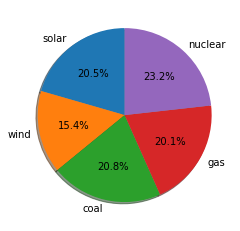

In [12]:
results = robust2([0, 0])
print('Cost function opt results: ',round(results[0],2))
print('Alocation: ')
Alocation = results[1]
sizes = Alocation.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()


If we asumme the same level of uncertainty, i.e., gamma_1 = gamma_2 =2
We assume max uncertainty(the worst case):

Cost function opt results:  9.25
Alocation: 


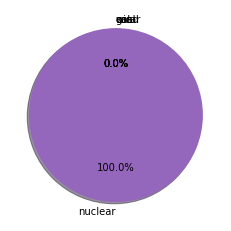

In [13]:
results = robust2([2, 2])
print('Cost function opt results: ',round(results[0],2))
print('Alocation: ')
Alocation = results[1]
sizes = Alocation.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

In [14]:
x = np.linspace(0, 2, 21)
decision = [robust2([i, i]) for i in x]

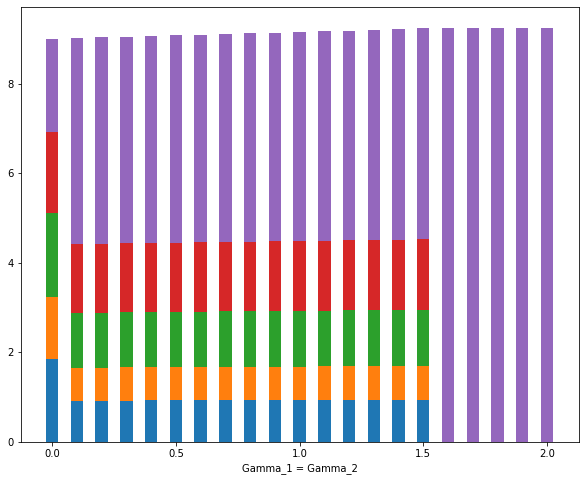

In [15]:
bar0 = []
bar1 = []
bar2 = []
bar3 = []
bar4 = []
bar5 = []
for i in decision:
    bar0.append(i[0])
    a = sum(i[1])
    bar1.append(i[1][0]*i[0]/a)
    bar2.append(i[1][1]*i[0]/a)
    bar3.append(i[1][2]*i[0]/a)
    bar4.append(i[1][3]*i[0]/a)
    bar5.append(i[1][4]*i[0]/a)
plt.figure(figsize=(10, 8))
plt.bar(x, bar1, width = 0.05, align='center')
plt.bar(x, bar2, width = 0.05, align='center', bottom = bar1)
plt.bar(x, bar3, width = 0.05, align='center', bottom = [bar1[i] + bar2[i] for i in range(len(bar3))])
plt.bar(x, bar4, width = 0.05, align='center', bottom = [bar1[i] + bar2[i]+ bar3[i] for i in range(len(bar3))])
plt.bar(x, bar5, width = 0.05, align='center', bottom = [bar1[i] + bar2[i]+ bar3[i]+ bar4[i] for i in range(len(bar3))])


plt.xlabel("Gamma_1 = Gamma_2")

plt.show()

In [16]:
bar0

[9.00000000000005,
 9.015037594279365,
 9.030125523012513,
 9.045264040219873,
 9.06045340046116,
 9.075693860386789,
 9.09098567818026,
 9.106329115553123,
 9.121724429416732,
 9.13717188823031,
 9.152671755725127,
 9.168224298980979,
 9.183829787233938,
 9.199488494689742,
 9.215200683282347,
 9.23096663368039,
 9.246575342465736,
 9.246575342465913,
 9.246575344808953,
 9.246575342463018,
 9.246575342465947]